#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# 1. Знакомство с данными и предобработка

**Примерный алгоритм выполнения шага:**
- подключить библиотеки
- создать переименные и "открыть" в них данные
- посмотреть на данные
- найти несоответствие типа данных с их назначением
- исправить типы данных на корректные
- проверить данные на предмет пропусков и дубликатов

**Наименование исследования: "Анализ вероятных причин убыточной маркетинговой кампании развлекательного приложения Procrastinate Pro+"**

- **Цель исследования:** с помощью имеющихся данных предоставить рекомендацию маркетинговому отделу компании, занимающейся развитием продукта "Procrastinate Pro+", что именно могло стать причиной неудачной кампании и предложить возможные способы решения проблемы.

- **Задачи исследования:** рассчитать с помощью имеющихся функций ключевые метрики, которые позволят найти вероятный дисбаланс в маркетинговой кампании

**Ожидаемый результат исследования:** предоставление обоснованной рекомендации маркетинговому отделу, сделанной на основании выявленных зависимостей и показателей ключевых метрик

## 1.1. Изучение датасетов и их характеристик 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date, datetime, timedelta
import numpy as np
import math

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
display(visits.head(10))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
display(orders.head(10))

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
display(costs.head(10))

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [12]:
visits.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
costs.duplicated().sum()

0

**Итоги знакомства с данными:**
- в данных нет пропусков и дубликатов
- данные во всех трех датафреймах имеют неправильным тип данных - с ними нельзя будет проводить корректный анализ
- названия столбцов во всех датафреймах не соответствуют "правилам хорошего кода", наименования начинаются с большой буквы, а в качестве пробела используется, извиняюсь за тавтологию, пробел, а не нижнее подчеркивание. Это не только дурной тон, но и вероятные ошибки в коде

## 1.2. Предобработка данных

**Сперва приведем в порядок наименование столбцов во всех датасетах:**

In [15]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
display(visits.columns.tolist())

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [16]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})
display(orders.columns.tolist())

['user_id', 'event_dt', 'revenue']

In [17]:
costs.columns = costs.columns.str.lower()
display(costs.columns.tolist())

['dt', 'channel', 'costs']

**Затем, поправим тип данных:**

In [18]:
visits['session_start'] = pd.to_datetime(visits['session_start'], format='%Y%m%dT%H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%Y%m%dT%H:%M:%S')

In [19]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y%m%dT%H:%M:%S')

In [20]:
costs['dt'] = pd.to_datetime(costs['dt'])

## 1.3. Выводы

- Имеется 3 датасета с корректными данными
- Трудоемкая предобработка данных не потребовалась: пропусков и дубликатов в данных не было
- Корректным расчетам препятствовал только неверный тип данных в столбцах с датами

# Шаг 2. Объявление функций для последующих расчетов

In [21]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [22]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [24]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
#функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [26]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [27]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [29]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

# Шаг 3. Исследовательский анализ данных

**Примерный план выполнения шага:**
- Создание профилей пользователей
- Установить, люди из каких стран являются клиентами приложения
- Определить, с каких устройств клиенты "сидят" в приложении
- Установить источники привлечения клиентов в приложение

## 3.1. Создание профилей

In [30]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head()) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


**Также, определим минимальную и максимальную даты привлечения пользователей:**

In [31]:
print('"Минимальная" дата привлечения пользователей:', profiles['dt'].min())
print('"Максимальная" дата привлечения пользователей:', profiles['dt'].max())

"Минимальная" дата привлечения пользователей: 2019-05-01 00:00:00
"Максимальная" дата привлечения пользователей: 2019-10-27 00:00:00


**Вывод:** Полученный диапазон дат соответствует обозначенным датам, содержащимся в ТЗ от заказчика. Таким образом, можно убедиться, что временные рамки в дальнейшем исследовании будут корректны.

## 3.2. Определение стран, пользователи из которых являются клиентами приложения

**Определим количество пользователей из разных стран и их процентное соотношение среди общего числа клиентов:**

Способ решения:
- Создать пустой датафрейм
- Сгруппировать данные юзеров по стране, в качестве агрегирующей функции указать подсчет количества
- Найти процентное соотношение, сколько % от общего числа клиентов "базируются" в каждой стране
- Отсортировать по убыванию, чтобы в первых строках были страны, где приложение наиболее популярно

In [32]:
region_user = pd.DataFrame()
region_user['count_users'] = profiles.groupby('region')['user_id'].count()
region_user['percent, %'] = ((region_user['count_users'] / profiles['region'].count()) * 100)
region_user.sort_values(
    by='percent, %', ascending=False).round(2)

,count_users,"percent, %"
region,,
United States,100002,66.66
UK,17575,11.72
France,17450,11.63
Germany,14981,9.99


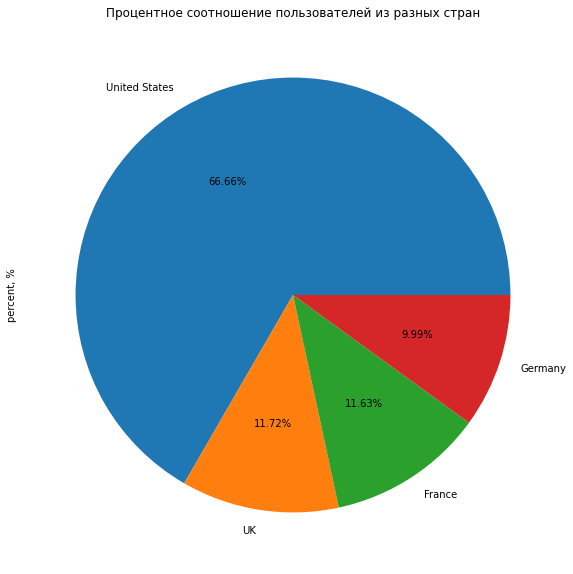

In [33]:
region_user.sort_values(
    by='percent, %', ascending=False).round(2).plot(y='percent, %', kind='pie', figsize=(10, 10), legend=False, title='Процентное соотношение пользователей из разных стран', autopct='%1.2f%%'
    );

Видим, что 66% процентов пользователей "сосредоточены" в США. Европейские страны "довольствуются" оставшимися 33,3%

**Найдем, какие страны приносят приложению основную выручку и в каком соотношении:**

Способ решения:
- Создать пустой датафрейм
- Сгруппировать данные только по "оплатившим" клиентам по стране, в качестве агрегирующей функции указать подсчет количества
- Найти процентное соотношение "экономической эффективности" страны в плане исследуемого приложения
- Отсортировать по убыванию, чтобы в первых строках были самые прибыльные сегменты ренка

In [34]:
region_payment = pd.DataFrame()

region_payment['count_users'] = profiles.groupby('region')['user_id'].count()
region_payment['count_users_payer'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payment['percent, %'] = ((region_payment['count_users_payer'] / profiles.query('payer == True')['region'].count()) * 100)
region_payment['conversion, %'] = (region_payment['count_users_payer'] / region_payment['count_users']) * 100
region_payment.sort_values(
    by='conversion, %', ascending=False).round(2)  

,count_users,count_users_payer,"percent, %","conversion, %"
region,,,,
United States,100002,6902,77.72,6.90
Germany,14981,616,6.94,4.11
UK,17575,700,7.88,3.98
France,17450,663,7.47,3.80


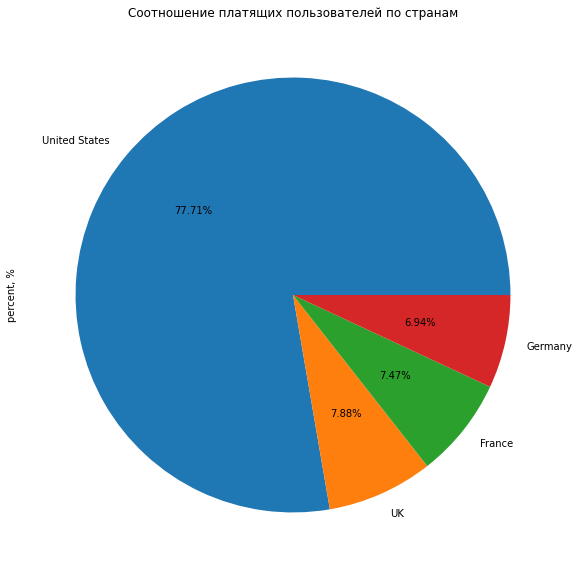

In [35]:
region_payment.sort_values(
    by='percent, %', ascending=False).round(2).plot(y='percent, %', kind='pie', figsize=(10, 10), legend=False, title='Соотношение платящих пользователей по странам', autopct='%1.2f%%'
    );  

Можно сделать следующий вывод: подавляющее большинство прибыли (~78%) продукту приносят жители США. Три других "источника прибыли" почти поровну приносят прибыль, 6-8 процентов, что в 10 раз меньше явного "лидера".

Наиболее высокая конверсия также у США (7%), на втором месте Германия (4%), у оставшихся стран конверсия почти идентична.

В целом, вывод очевиден, логично, что если основная аудитория продукта - это США, основную "кассу" тоже сделают они. В Германии же, например, продукт привлекает куда меньший интерес и прибыль от этого сегмента всего 7%

## 3.3. Определение устройств, с помощью которых клиенты заходят в приложение

**Узнаем, какими устройствами пользуются клиенты и какова прибыль от каждого типа гаджетов:**

Примечание: порядок решения аналогичен предыдущему шагу, но в этот раз будем группировать по устройствам

In [36]:
user_device = pd.DataFrame()
user_device['count_users'] = profiles.groupby('device')['user_id'].count()
user_device['percent, %'] = ((user_device['count_users'] / profiles['device'].count()) * 100)
user_device.sort_values(
    by='percent, %', ascending=False).round(2)

,count_users,"percent, %"
device,,
iPhone,54479,36.32
Android,35032,23.35
PC,30455,20.30
Mac,30042,20.03


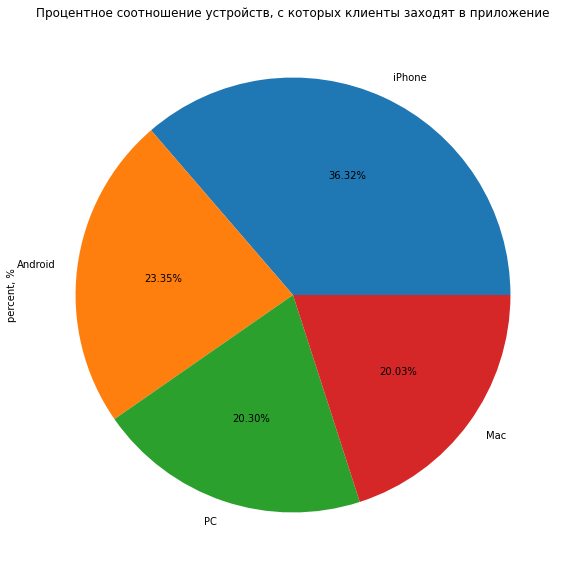

In [37]:
user_device.sort_values(
    by='percent, %', ascending=False).round(2).plot(y='percent, %', kind='pie', figsize=(10, 10), legend=False, title='Процентное соотношение устройств, с которых клиенты заходят в приложение', autopct='%1.2f%%'
    );

Явный лидер - IPhone. Android, PC и Mac встраются почти у равного количества пользователей, но все-таки второе место за андроидом

In [38]:
device_payment = pd.DataFrame()

device_payment['count_users'] = profiles.groupby('device')['user_id'].count()
device_payment['count_users_payer'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payment['percent, %'] = ((device_payment['count_users_payer'] / profiles.query('payer == True')['device'].count()) * 100)
device_payment['conversion, %'] = (device_payment['count_users_payer'] / device_payment['count_users']) * 100
device_payment.sort_values(
    by='conversion, %', ascending=False).round(2)

,count_users,count_users_payer,"percent, %","conversion, %"
device,,,,
Mac,30042,1912,21.53,6.36
iPhone,54479,3382,38.08,6.21
Android,35032,2050,23.08,5.85
PC,30455,1537,17.31,5.05


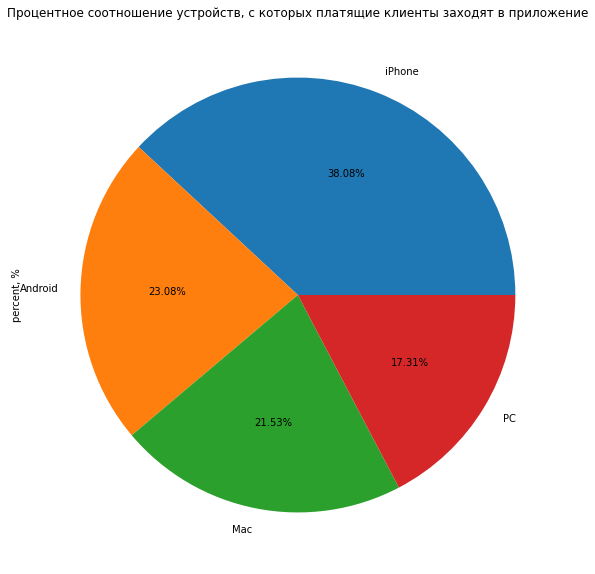

In [39]:
device_payment.sort_values(
    by='percent, %', ascending=False).round(2).plot(y='percent, %', kind='pie', figsize=(10, 10), legend=False, title='Процентное соотношение устройств, с которых платящие клиенты заходят в приложение', autopct='%1.2f%%'
    );

С точки зрения "финансов" на первом месте вполне ожидаемо оказался IPhone, на втором месте Android. Неожиданно, PC оказался на последнем месте, хотя по количеству пользователей он шел вровень с Mac'ом. Видимо, продукт проигрывает другим видам активности для компьютеров.

Однако, показатель конверсии на Mac и IPhone почти идентичен - 6,36 и 6.21% соответственно. Меньший показатель у PC - чуть более 5%. 

## 3.4. Определение наиболее эффективных рекламных источников

**Узнаем, какие виды рекламы привели в приложение больше всего "платящих" пользователей:**

Ищем зависимость количества пользователей от вида рекламы

In [40]:
channel_advertisement = pd.DataFrame()
channel_advertisement['count_users'] = profiles.groupby('channel')['user_id'].count()
channel_advertisement['percent, %'] = ((channel_advertisement['count_users'] / profiles['channel'].count()) * 100)
channel_advertisement.sort_values(
    by='percent, %', ascending=False).round(2)

,count_users,"percent, %"
channel,,
organic,56439,37.62
FaceBoom,29144,19.43
TipTop,19561,13.04
OppleCreativeMedia,8605,5.74
LeapBob,8553,5.70
WahooNetBanner,8553,5.70
RocketSuperAds,4448,2.97
MediaTornado,4364,2.91
YRabbit,4312,2.87


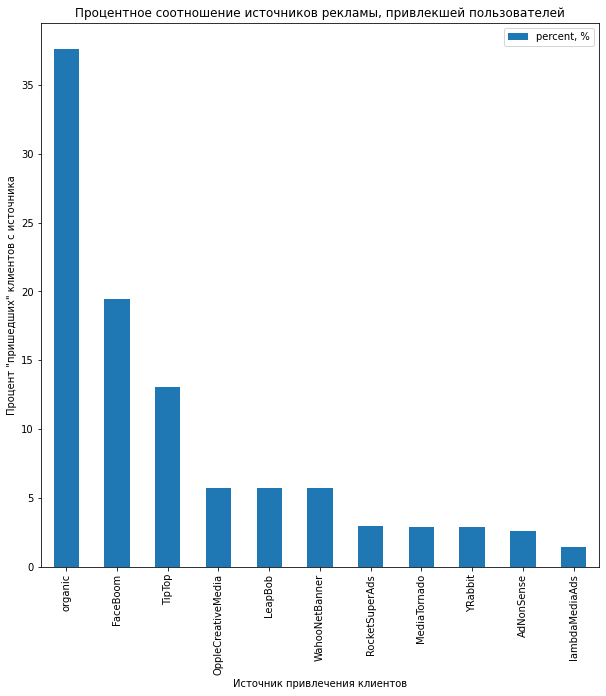

In [41]:
channel_advertisement.sort_values(
    by='percent, %', ascending=False).round(2).plot(y='percent, %', kind='bar', figsize=(10, 10), title='Процентное соотношение источников рекламы, привлекшей пользователей');
plt.xlabel('Источник привлечения клиентов');
plt.ylabel('Процент "пришедших" клиентов с источника');

Можно уверенно заявить, что органический трафик - основной инструмент привлечения пользователей, то есть, такие клиенты бесплатны для бюджета компании. FaceBoom и TipTop тоже выделяются, но остальные источники привлекают куда меньше клиентов

In [42]:
channel_advertisement_payment = pd.DataFrame()

channel_advertisement_payment['count_users'] = profiles.groupby('channel')['user_id'].count()
channel_advertisement_payment['count_users_payer'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_advertisement_payment['percent, %'] = ((channel_advertisement_payment['count_users_payer'] / profiles.query('payer == True')['channel'].count()) * 100)
channel_advertisement_payment['conversion, %'] = (channel_advertisement_payment['count_users_payer'] / channel_advertisement_payment['count_users']) * 100
channel_advertisement_payment.sort_values(
    by='conversion, %', ascending=False).round(2)

,count_users,count_users_payer,"percent, %","conversion, %"
channel,,,,
FaceBoom,29144,3557,40.05,12.20
AdNonSense,3880,440,4.95,11.34
lambdaMediaAds,2149,225,2.53,10.47
TipTop,19561,1878,21.15,9.60
RocketSuperAds,4448,352,3.96,7.91
WahooNetBanner,8553,453,5.10,5.30
YRabbit,4312,165,1.86,3.83
MediaTornado,4364,156,1.76,3.57
LeapBob,8553,262,2.95,3.06


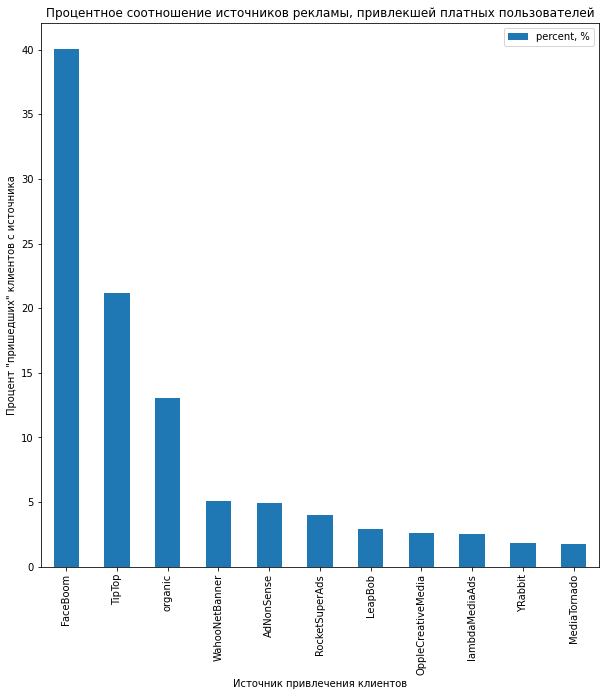

In [43]:
channel_advertisement_payment.sort_values(
    by='percent, %', ascending=False).round(2).plot(y='percent, %', kind='bar', figsize=(10, 10), title='Процентное соотношение источников рекламы, привлекшей платных пользователей');
plt.xlabel('Источник привлечения клиентов');
plt.ylabel('Процент "пришедших" клиентов с источника');

Оценка данных по оплатившим пользователям позволяет сделать несколько другие выводы: прибыль приносят клиенты, привлеченные через Faceboom и TipTop. "Бесплатные" для маркетингового бюджета клиенты (органический трафик) лишь на третьем месте.

В свою очередь, по конверсии выделяются 4 источника: FaceBoom, AdNonSense, lambdaMediaAds, TipTop

## 3.5. Выводы

- Портрет "наиболее прибыльного" пользователя приложения таков: устройство - IPhone, страна - США, реклама с помощью которой он попал в приложение - Faceboom.
- Стоит также отметить, что основной сегмент пользователей продукта - жители США (78% от общего числа клиентов). На европейском рынке продукт себя не зарекомендовал, как востребованный.
- Большая часть клиентов имеет IPhone, но Android, Mac и PC тоже распространены. Показатели конверсии на iPhone и Mac почти идентичны, но у Mac'а конверсия все-таки несколько эффективнее
- Меньше всего платящих пользователей наблюдается на PC
- Больше всего "новых" людей было привлечено в приложение путем органического трафика. Но с точки зрения приобретения платных возможностей приложения - органический трафик не самый прибыльный источник
- С точки зрения рентабельности вложений в рекламу удачным решением оказалось использование FaceBoom - через него "пришло" 40% платящих пользователей - конверсия этого источника также самая высокая

# Шаг 4. Маркетинг

**Примерный план выполнения шага:**
- Узнать сумму средств, вложенных в маркетинговую кампанию
- Установить. как менялись маркетинговые расходы с течением времени
- Построить график и с его помощью сделать выводы
- Узнать, какова средняя стоимость привлечения одного клиента и определить CAS маркетинговой кампании

## 4.1. Определение суммы расходов на маркетинг и распределения трат по источникам:

In [44]:
display(costs['costs'].sum().round(2))

105497.3

Суммарный расход на маркетинг составил ~105,5 тысяч долларов

## 4.2. Установление зависимости между источниками привлечения клиентов и затратами на них

**Построим график изменения трат на маркетинг с течением времени:**

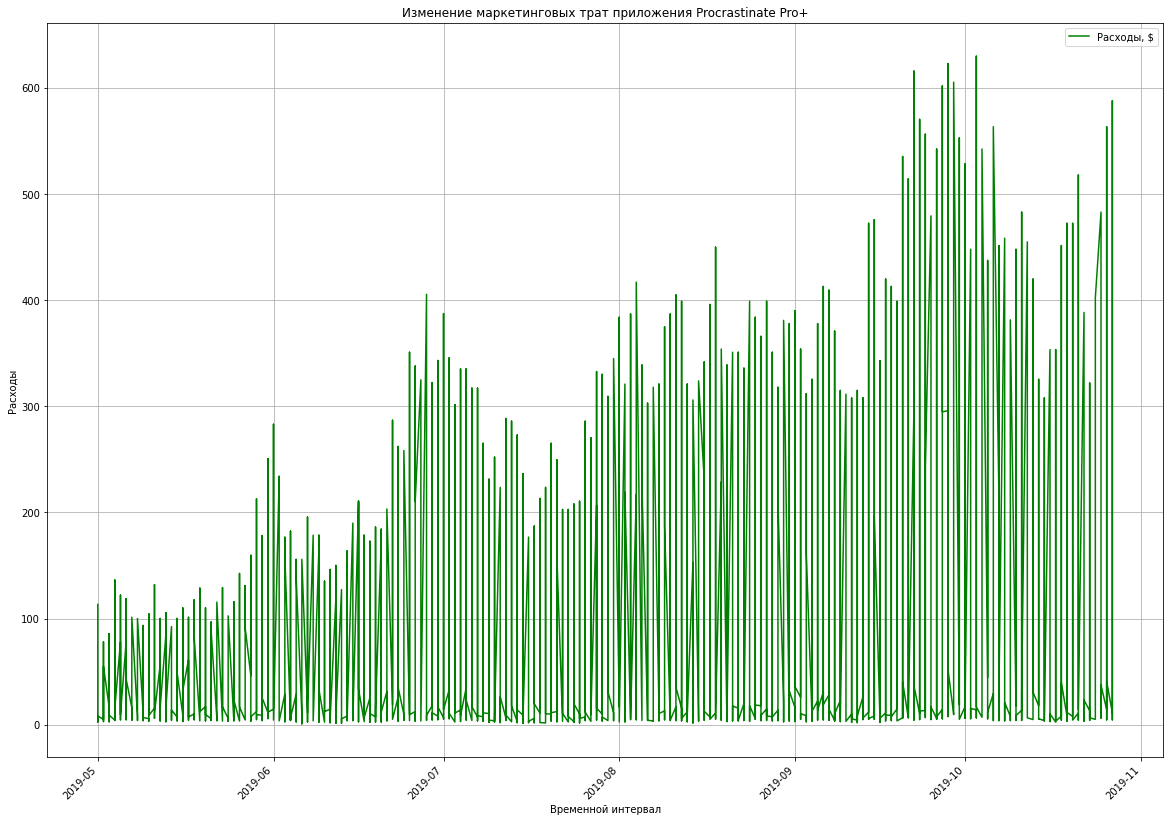

In [45]:
costs.plot(y='costs',
           x='dt',
           figsize=(20, 15),
           grid=True,
           rot=45,        
           label='Расходы, $',                      
           legend=True,
          color='green') 

plt.title('Изменение маркетинговых трат приложения Procrastinate Pro+')
plt.xlabel('Временной интервал')
plt.ylabel('Расходы')
plt.show()

За те 6 месяцев, что отражены на графике маркетинговые расходы на продвижение продукта многократно выросли, примерно в 6 раз. Если в мае мы видим отметку в ~100 долларов , то в октябре был зарегистрирован пик - более 600 долларов. Стоит также отметить некое снижение финансирования примерно в середине октября, но затем наблюдается подъем также в "район" 600.

**Аналогичным методом, который был использован на шаге 3 установим распределение расхода в зависимости от источника превлечения клиента:**

In [46]:
channel_costs = pd.DataFrame()
channel_costs['cost_amount_sum'] = costs.groupby('channel')['costs'].sum()
channel_costs['percent, %'] = ((channel_costs['cost_amount_sum'] / costs['costs'].sum()) * 100)
channel_costs.sort_values(by='percent, %', ascending=False).round(2)

,cost_amount_sum,"percent, %"
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


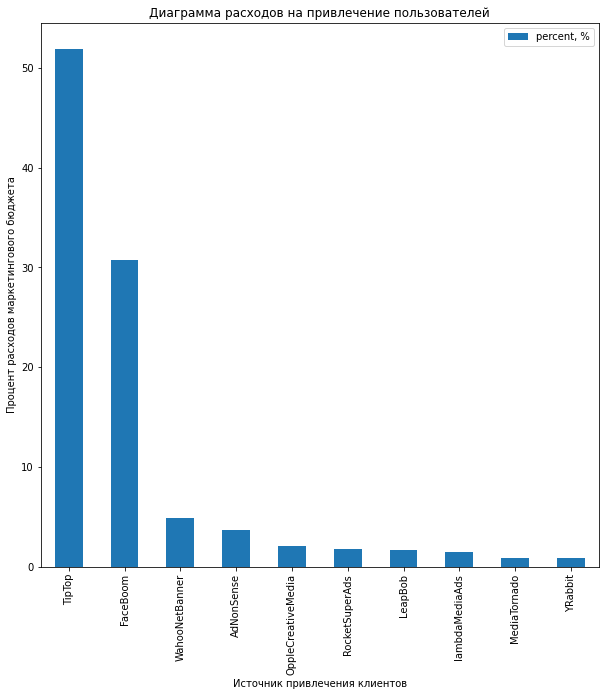

In [47]:
channel_costs.sort_values(
    by='percent, %', ascending=False).round(2).plot(y='percent, %', kind='bar', figsize=(10, 10), title='Диаграмма расходов на привлечение пользователей');
plt.xlabel('Источник привлечения клиентов');
plt.ylabel('Процент расходов маркетингового бюджета');

Таблица и график позволяют сделать следующий вывод: больше всего маркетинговых затрат уходян на TipTop и Faceboom (суммарно 80% от всех маркетинговых расходов)

**Исследуем зависимость затрат на каждый канал привлечения новых клиентов с течением времени:**

Для этого создадим "сводную" таблицу

In [48]:
waste_marketing_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
display(waste_marketing_data.head(10))

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05-01,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.1,17.6
2019-05-02,34.65,78.1,2.94,5.04,4.25,16.965,55.0,7.2,9.9,16.8
2019-05-03,47.25,85.8,2.73,6.96,5.75,16.380,64.0,8.4,9.0,16.8
2019-05-04,51.45,136.4,3.99,9.36,4.25,17.550,70.0,10.8,15.6,17.6
2019-05-05,36.75,122.1,4.62,11.04,5.50,27.495,78.0,12.0,9.6,12.8
2019-05-06,43.05,118.8,4.62,9.60,5.00,21.645,78.0,19.2,10.5,14.4
2019-05-07,30.45,101.2,4.20,8.88,5.75,18.720,77.0,8.4,9.3,16.0
2019-05-08,37.80,100.1,3.99,6.72,4.25,18.135,57.0,7.8,12.6,11.2
2019-05-09,37.80,93.5,3.78,6.72,4.25,18.720,46.0,11.4,11.1,10.4


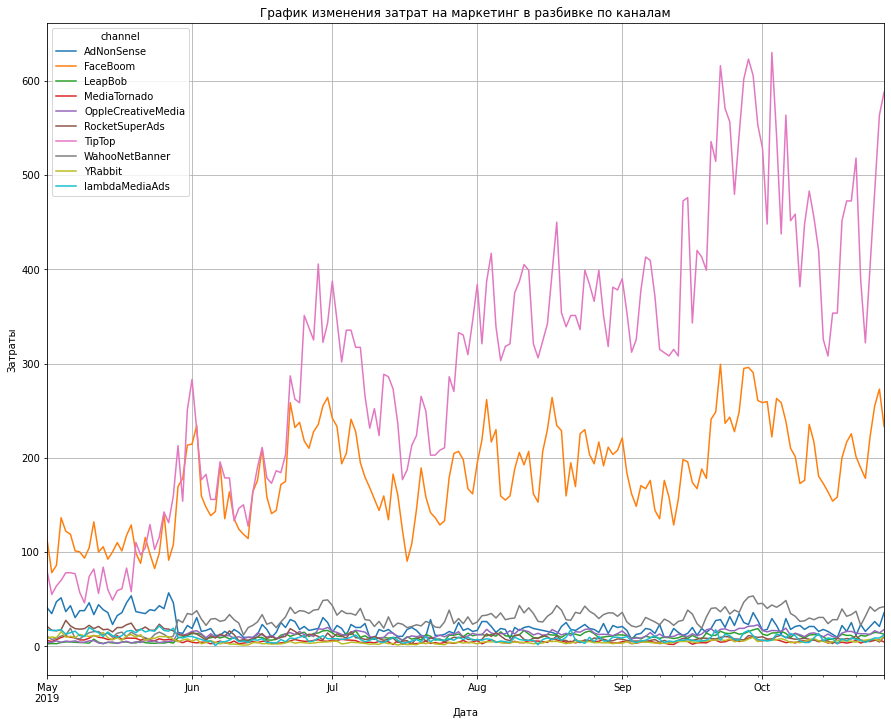

In [49]:
waste_marketing_data.plot(                                             
           figsize=(15, 12),
           grid=True,                            
           legend=True
      ) 

plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

График выглядит вполне предсказуемо, с учетом ранее установленного факта, что есть 2 наиболее "весомых" затраты на маркетинг, которые составили более 80% от суммарных расходов(Tip-Top и Faceboom). Логично, что и на графике они "сминают" более дешевые источники.

Имеет смысл условно разбить траты на "монстров" маркетинговых расходов (~80%) и "мелких игроков" (оставшиеся 20%)

In [50]:
waste_marketing_data_80 = waste_marketing_data[['FaceBoom', 'TipTop']]
display(waste_marketing_data_80.head())

channel,FaceBoom,TipTop
dt,,
2019-05-01,113.3,80.0
2019-05-02,78.1,55.0
2019-05-03,85.8,64.0
2019-05-04,136.4,70.0
2019-05-05,122.1,78.0


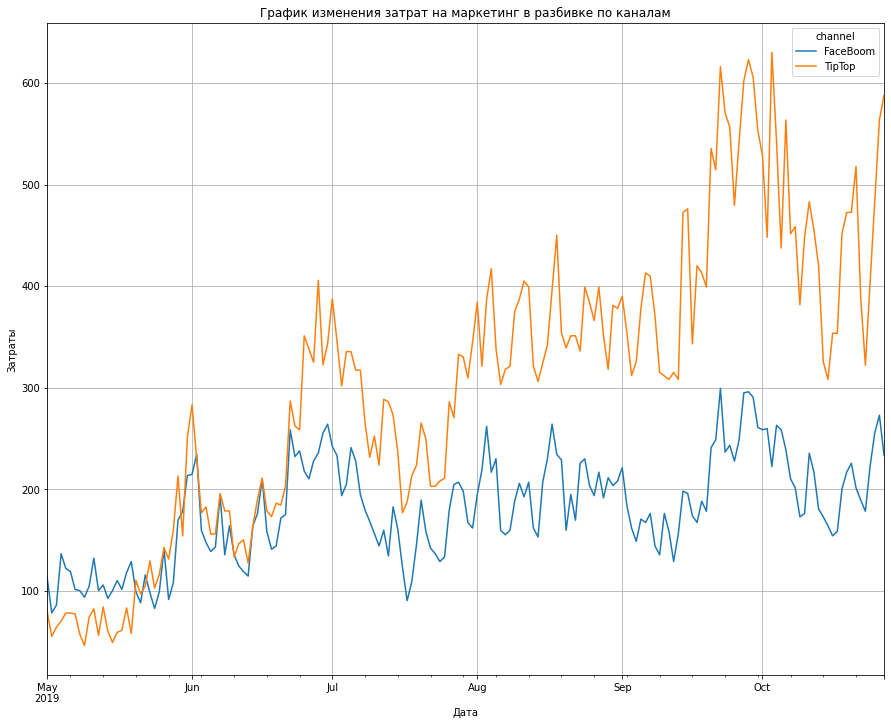

In [51]:
waste_marketing_data_80.plot(                                             
           figsize=(15, 12),
           grid=True,                            
           legend=True
      ) 

plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Если проанализировать две получившиеся кривые, то можно сделать вывод, что инвестиции в рекламу Tip-Top постепенно росли (за исключением ранее описанного спада), в то время, как FaceBoom "расходовал" бюджет куда стабильнее (диапазон от 100 до 300 долларов), что в любом случае почти в 2 раза меньше самой "дорогой" траты на Tip-Top

In [52]:
waste_marketing_data_20 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
display(waste_marketing_data_20.head())

channel,AdNonSense,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,
2019-05-01,40.95,2.52,6.24,4.25,21.060,10.8,8.1,17.6
2019-05-02,34.65,2.94,5.04,4.25,16.965,7.2,9.9,16.8
2019-05-03,47.25,2.73,6.96,5.75,16.380,8.4,9.0,16.8
2019-05-04,51.45,3.99,9.36,4.25,17.550,10.8,15.6,17.6
2019-05-05,36.75,4.62,11.04,5.50,27.495,12.0,9.6,12.8


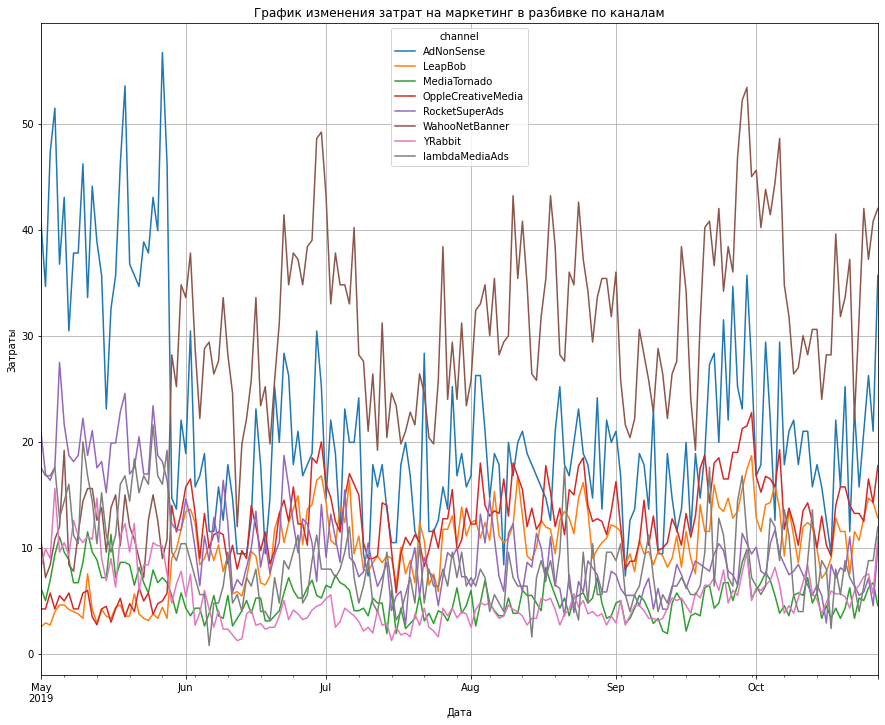

In [53]:
waste_marketing_data_20.plot(                                             
           figsize=(15, 12),
           grid=True,                            
           legend=True
      ) 

plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Безусловно, график менее информативен с таким количеством кривых, но он все-таки позволит выявить еще 2 затраты на маркетинг. Стоит сразу сделать оговорку, что эти траты почти в 10 раз меньше, чем пик Tip-Top'а. Тем не менее, из меньших расходов выделяется AdNonSens - его максимум около 55 долларов и WahooNetBanner - он тоже однажды подобрался к этой отметке. Остальные траты были в пределах 30 долларов. Однако, AdNonSens перестал быть лидером по вливаниям среди этой условной категории, а в WahooNetBanner - наоборот. Видимо, решили сделать упор на баннеры. 

## 4.3. Определение суммы расходов на маркетинг и распределения трат на привлечение каждого пользователя

Будем работать с таблицей с портретами пользователей, который был получен на прошлых этапах. Сумма общих расходов уже была найдена шагом ранее, нет смысла дублировать. Посмотрим характеристики датасета с помощью describe и установим в какую сумму "обходится" новый клиент.

Примечание: на данном шаге следует отказаться от органического трафика, т.к. на маркетинговый бюджет клиенты с него не влияли. Создадим срез

In [54]:
profiles_not_organic = profiles.query('channel != "organic"')
display(profiles_not_organic.sample(10))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
1599,10684460396,2019-05-21 11:28:18,FaceBoom,Mac,United States,2019-05-21,2019-05-01,False,1.128205
27021,180153356487,2019-06-24 14:04:37,OppleCreativeMedia,Android,Germany,2019-06-24,2019-06-01,False,0.246094
54909,364994101985,2019-07-02 19:34:20,YRabbit,Mac,United States,2019-07-02,2019-07-01,True,0.169091
74668,495369278814,2019-10-21 04:15:25,FaceBoom,PC,United States,2019-10-21,2019-10-01,True,1.094022
137598,917487644336,2019-09-13 02:33:06,OppleCreativeMedia,PC,France,2019-09-13,2019-09-01,False,0.250000
70190,465917865194,2019-10-26 20:52:00,FaceBoom,Mac,United States,2019-10-26,2019-10-01,False,1.108943
42914,284290955269,2019-09-15 20:37:34,YRabbit,iPhone,United States,2019-09-15,2019-09-01,False,0.220000
4089,27354209001,2019-09-01 09:13:13,LeapBob,PC,France,2019-09-01,2019-09-01,False,0.206379
19521,129949769735,2019-08-06 06:05:19,TipTop,PC,United States,2019-08-06,2019-08-01,False,3.060606
57948,384638702622,2019-06-02 09:40:42,TipTop,Android,United States,2019-06-02,2019-06-01,False,1.900000


In [55]:
profiles_not_organic.describe().round(2)

,user_id,acquisition_cost
count,9.356900e+04,93569.00
mean,4.995116e+11,1.13
std,2.881600e+11,0.99
min,5.993260e+05,0.12
25%,2.506301e+11,0.26
50%,4.972331e+11,1.08
75%,7.490889e+11,1.13
max,9.999799e+11,3.72


Максимальный расход на "человека" составил 3.72 доллара, медиана - чуть более доллара. Однако, среднее немного больше - 1,13 у.е. Вероятно, эта разница обусловлена "нестабильностью" вливания средств в маркетинг, может быть, траты увеличивались или уменьшались за временной интервал.

**Рассчитаем и визуализируем CAS:**

In [56]:
cac_by_channel = pd.DataFrame()
cac_by_channel['acquisition_cost_mean'] = profiles_not_organic.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).round(2)
display(cac_by_channel)

,acquisition_cost_mean
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


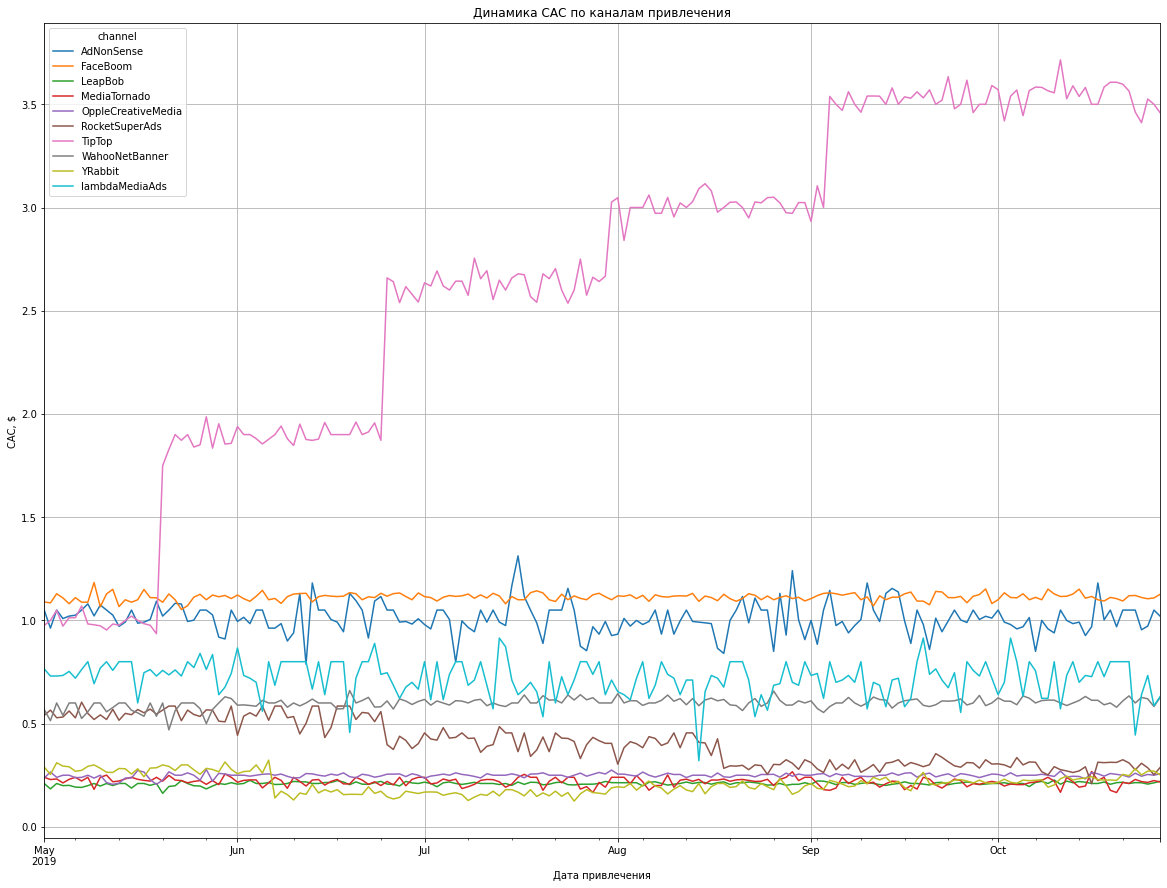

In [57]:
profiles_not_organic.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 15))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Эта визуализация позволяет нам подчеркнуть факт достаточно резкого увеличения "вливания" в Tip-Top. Если в середине мая CAS был районе доллара, то к ноябрю он находится в районе 3,5. Хотелось бы верить, что и прибыль от продукта выросла не менее, чем 3,5 раза, иначе, такая тактика была не только нерентабельной, но и убыточной.

## 4.4. Выводы

- Сумма маркетинговой кампании составила более 105 тысяч долларов
- Маркетинговые траты увеличились в 6 раз с мая по ноябрь соответственно
- TipTop и Faceboom составляют 80% трат на маркетинг. Также, весомый расход - AdNonSense, его стоимость почти как у FaceBoom
- Примерно в середине июля было принято решение об увеличении инвестиций в TipTop
- Среди более экономных решений, но менее эффективных в плане привлечения клиентов предпочтение отдается баннерам
- Наблюдаем небольшое падение динамики источника Rocket

# Шаг 5. Оценка окупаемости рекламы

**Примерный план выполнения шага:**
- Обозначить временные интервалы проведения анализа
- Передать необходимые параметры функциям, объявленным на шаге 2
- Изучить полученные визуализации ключевых метрик
- Найти причину убытков продукта

## 5.1. Изучение окупаемость рекламы

Обозначим требуемые заказчиком момент и горизонт анализа

In [58]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

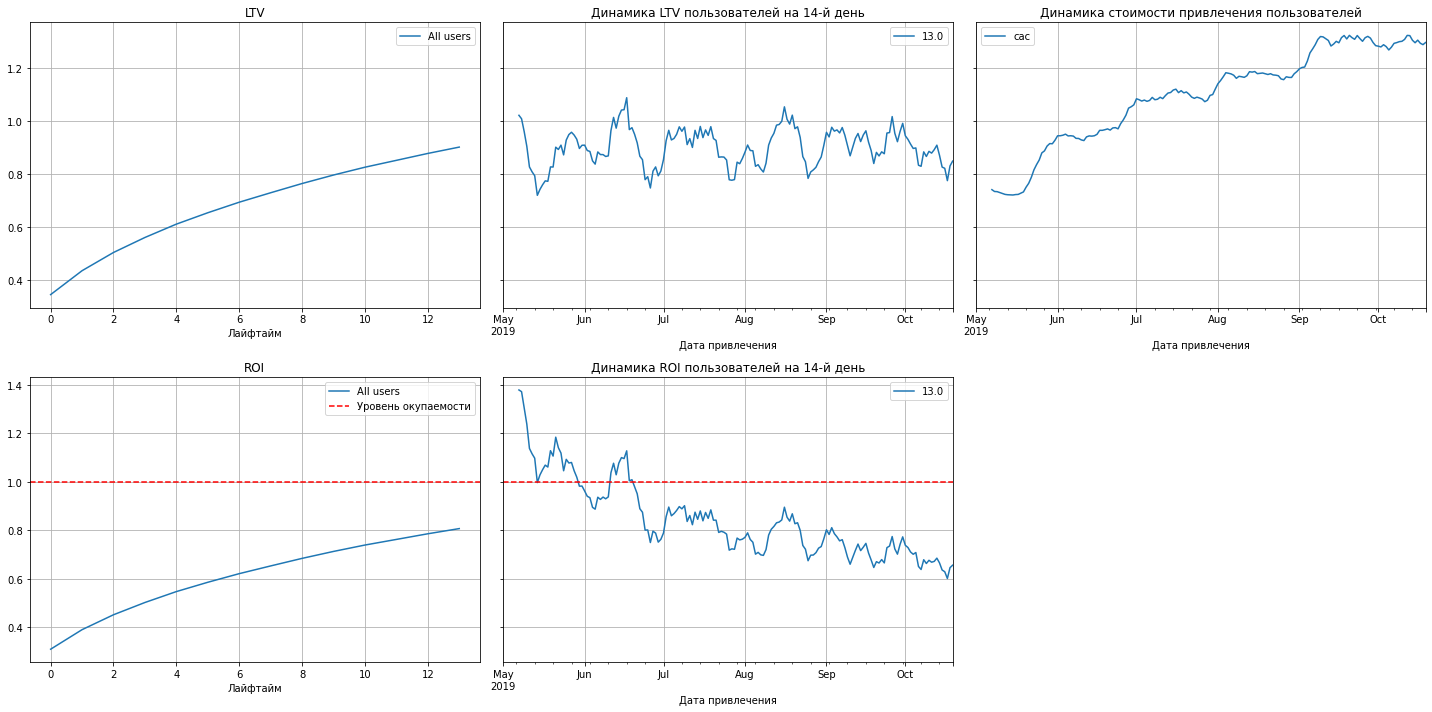

In [59]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Описание полученных результатов:**
- "Поведение" графика ROI говорит о том, что нет ошибки, т.к. он не "падает". Однако, реклама за 2 недели, которые мы рассматриваем не окупается, показатель 100% не превышен ни разу. Показатель около 80%
- Выводы CAS не изменились, по сравнению с теми, что были установлены на шаге 4 - вливания в маркетинг растут
- LTV ведет себя стабильно
- Динамика ROI свидетельствует о падении окупаемости бюджета. Причем, с середины июля компания работает в минус.

Однозначного ответа о том, почему имеют место убытки эта информация не дает. Стоит посмотреть метрики по всем имеющимся данных о пользователях, а именно устройства, сегменты рынка (страны), канал, "привлекший" клиента.

## 5.2. Анализ окупаемость рекламы с разбивкой по устройствам

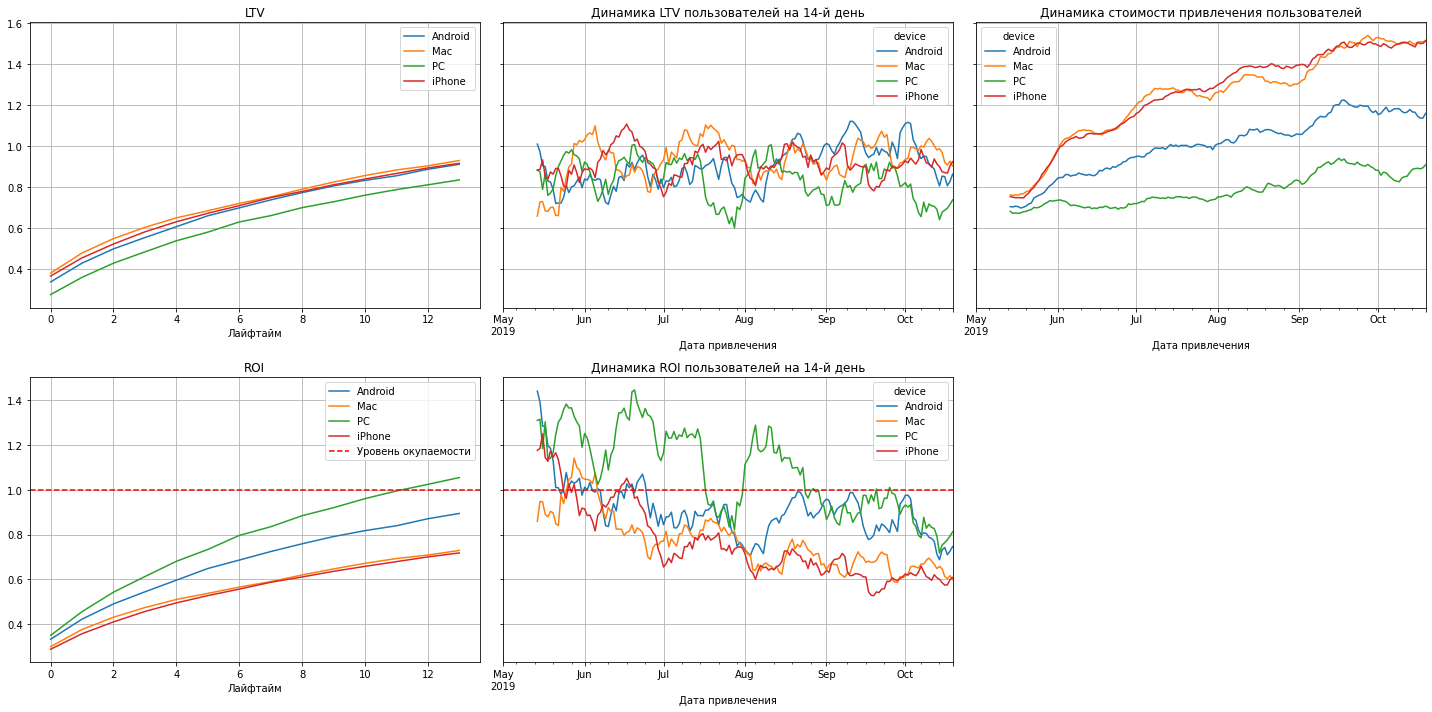

In [60]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Описание полученных результатов:**
- Затраты на привлечение всех пользователей многократно выросли, Mac и IPhone особенно. Не похоже, чтобы какую-то платформу просто убрали из рекламы
- Динамика ROI говорит о том, что в последнюю неделю мая многие пользователи покинули приложение, а дальше было, по сути, "падение" этого показателя. Исключение - PC, тут пользователи удерживались лучше (был спад в конце июля), затем, примерно до сентября, было удержание клиентов. В сентябре и далее удержание "неудовлетворительно" на всех дейвайсах
- ROI свидетельствует о том, что на окупаемость вышел лишь PC, и то, лишь в конце временного интервала, который изучается. То есть, о прибыль говорить, по сути, не приходится. Все остальные источники не достигли показателя 100%, у Android'а около 90, все остальные платформы ~75%

**Изучим показатели конверсии:**

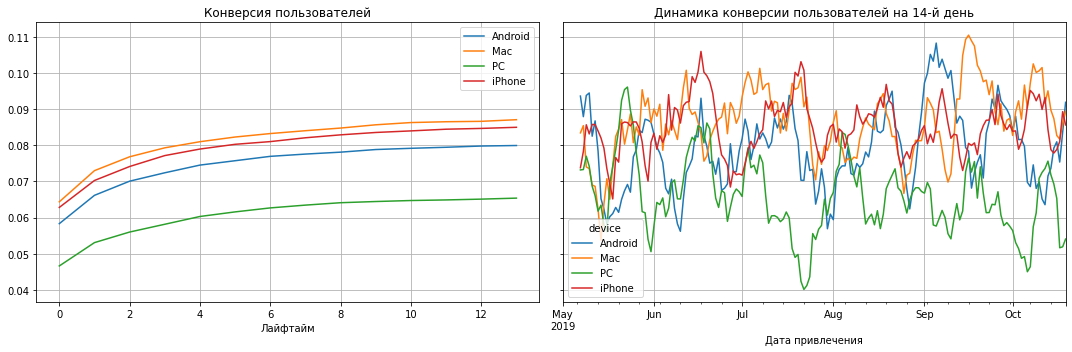

In [61]:
dimensions = ['device']


conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

В конверсии также не видимо ничего необычного, разве что PC несколько отстает от других платформ. Но помним, что на PC меньше всего платящих пользователей.

Посмотрим, как поведет себя удержание, возможно это даст ответ о причинах убытков.

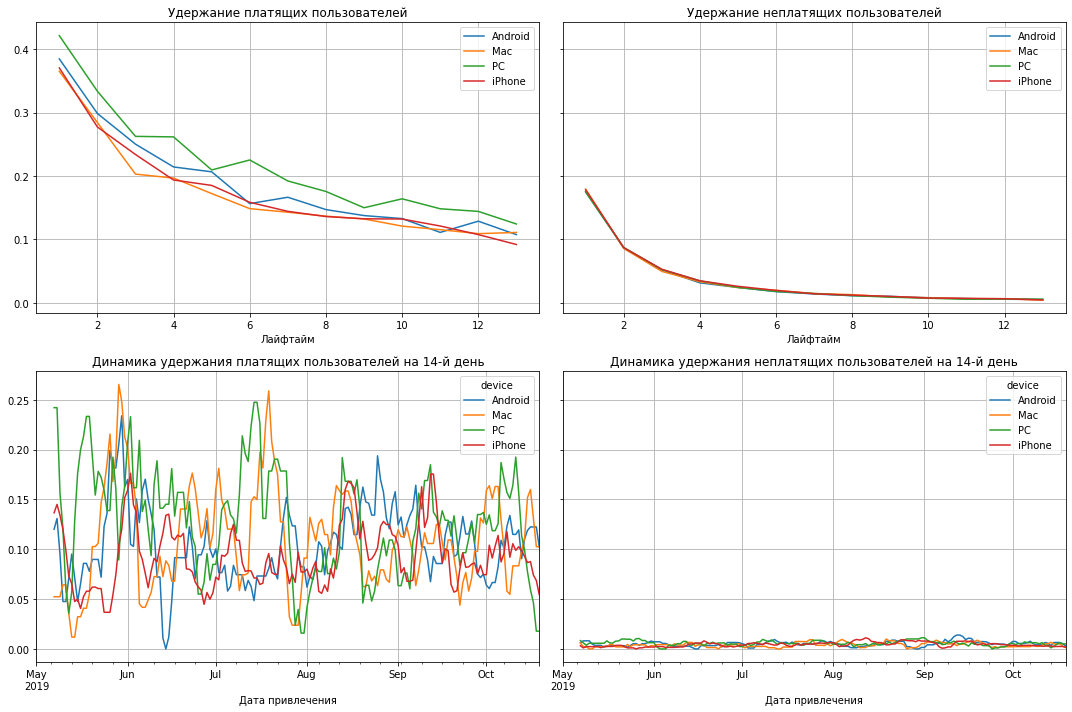

In [62]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Описание полученных результатов:**
- График удержания ведет себя одинаково стабильно
- Неплатящие пользователи "не задерживаются" в приложении
- Среди платящих пользователей на 14-й день лучше всего "задерживаются" клиенты с компьютеров, Mac - хуже всего

Здесь тоже нет вопроса о причинах убыточности кампании

Не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

## 5.3. Анализ окупаемость рекламы с разбивкой по странам

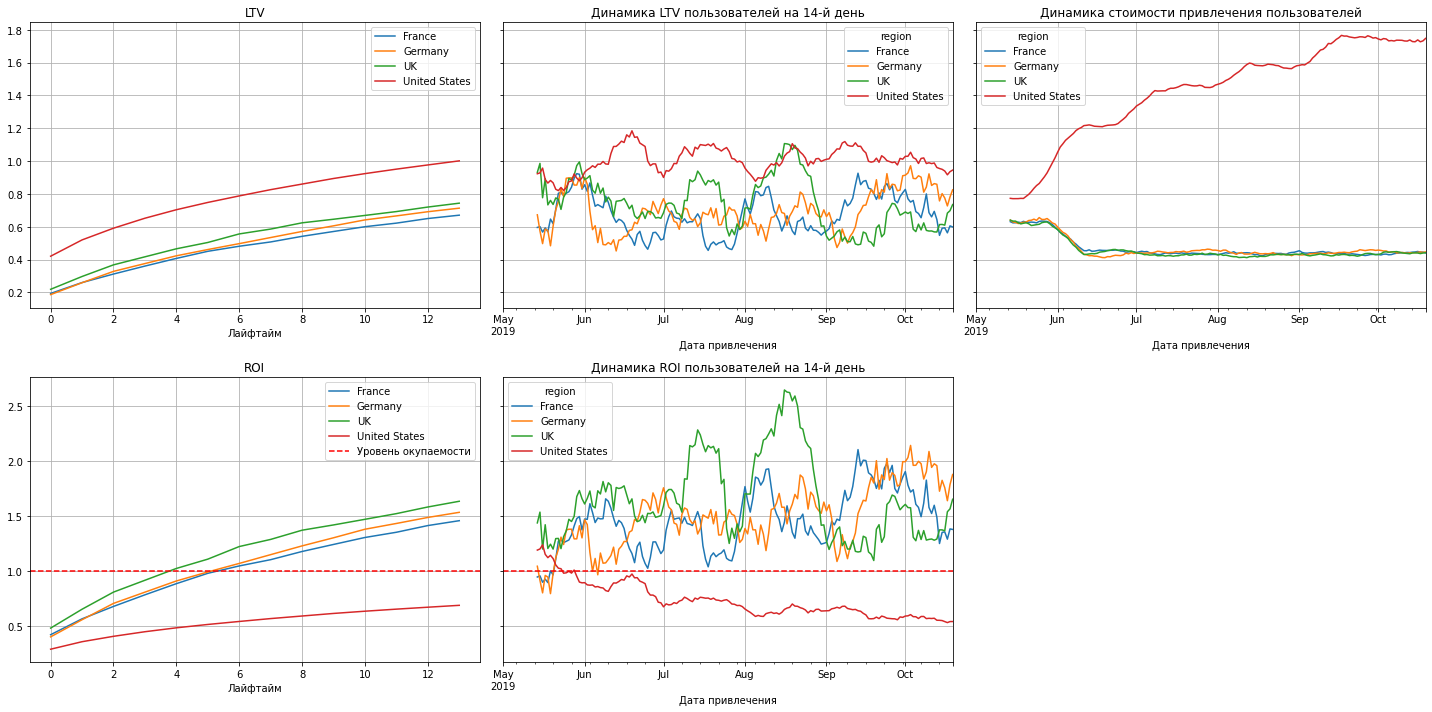

In [63]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Описание полученных результатов:**
- Наиболее весомая статья расходов - клиенты из США. Это неудивительно, с учетом того факта, что их подавляющее большинство. Причем "вливания" в рекламу для этого сегмента очевидно и многократно растут
- Динамика ROI свидетельствует об убыточности рекламы в США, причем оказалась она в этом "пИке" почти сразу - конец мая . При этом, все другие платформы отностильно стабильны
- LTV, скорее всего, связан с сезонным спросом, но выглядит стабильно
- На графике ROI видим, что США никогда не окупали свои затраты. Зато в других странах окупаемость имеет место

Кажется, есть зацепка. Убыточность явно связана с таким сегментом рынка, как США. Попробуем понять причины и установитель дополнительные зависимости. Взглянем на конверсию

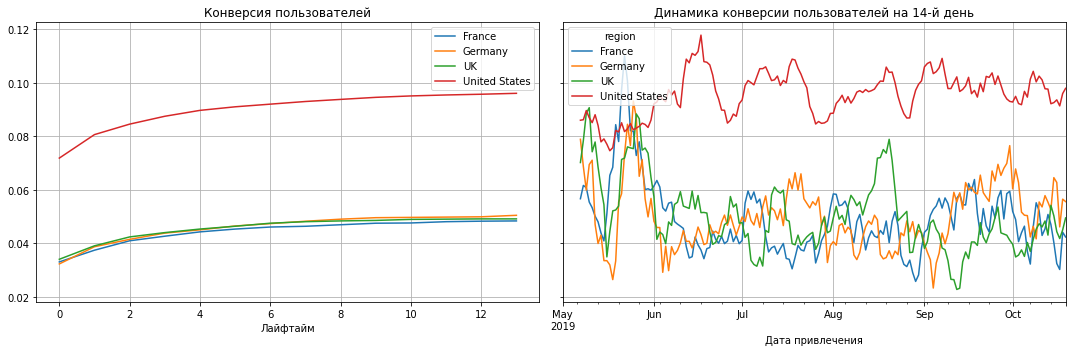

In [64]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

На графике нет ничего криминального. Конверсия в штатах значительно выше, можно сказать, что там более потенциально прибыльный рынок, люди готовы тратить деньги на платные опции приложения.
Конверсия из Европы ниже, но клиентов там многократно меньше. Посмотрим на удержание.

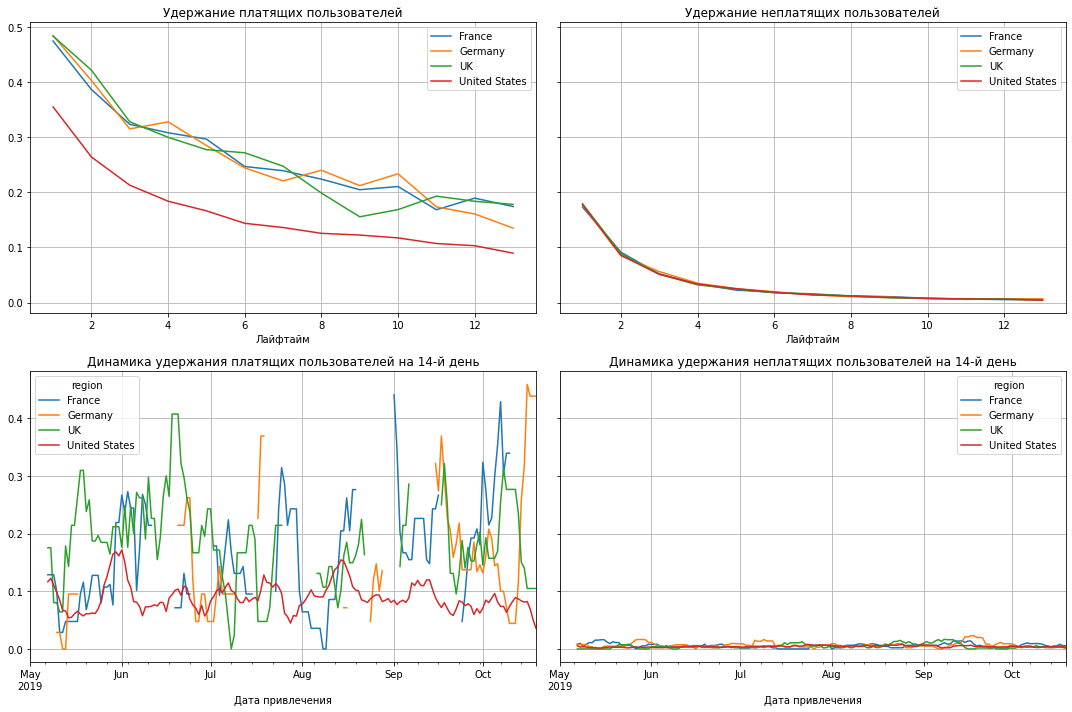

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Подтверждаем ранее подмеченную зацепку: люди из США уходят из приложения, причем куда чаще, чем европейцы. Осталось найти причину такого развития событий. Посмотрим разбивку по каналам привлечения.

## 5.4. Анализ окупаемости с разбивкой по каналам привлечения

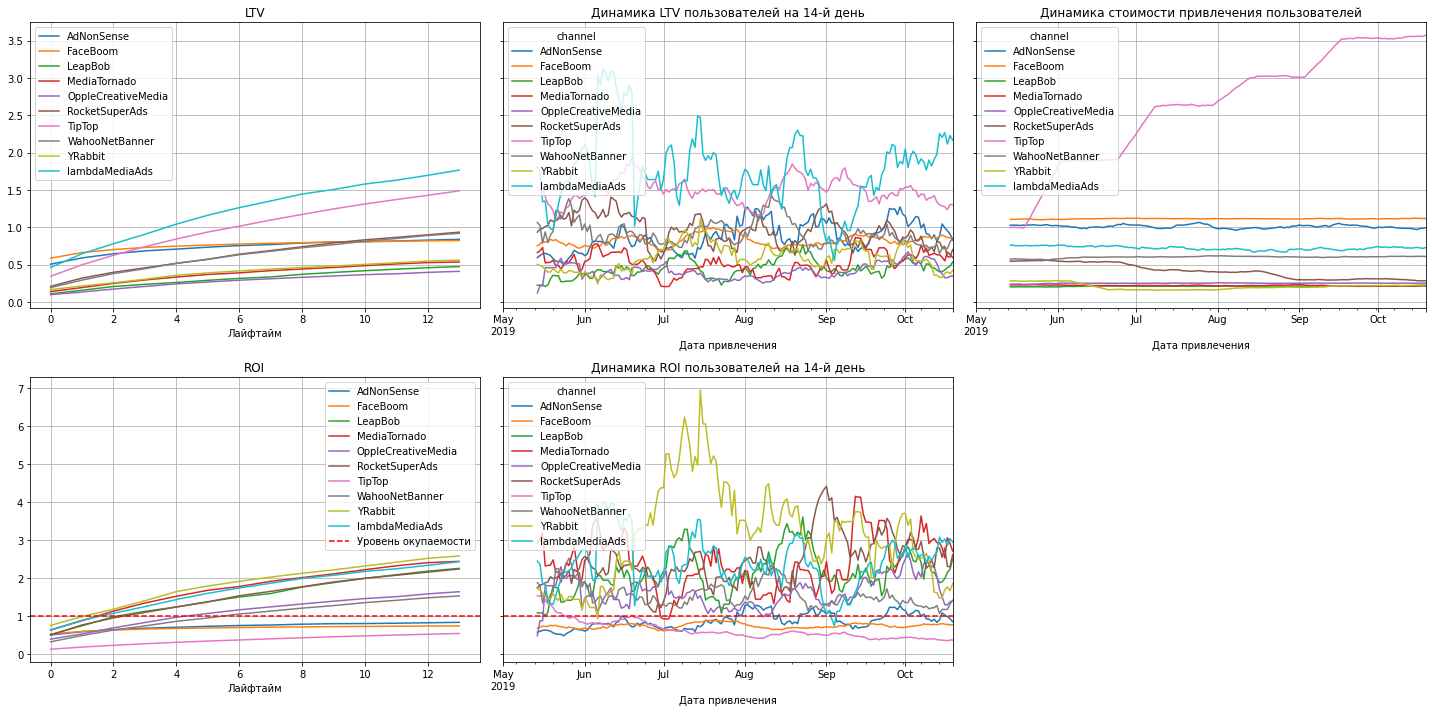

In [66]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Описание полученных результатов:**
- Продублируем факт резкого вливания средств в TipTop
- Видим, что окупаются почти все источники привлечения, как ни странно, среди тех, кто ни разу не превысил окупаемость и FaceBoom и TipTop. Видимо, не смотря на свои высокие траты должного эффекта эти источники не приносят. Также, не окупается LeapBob
- YRabbit показал достойный результат - люди, "пришедшие" из него "бегут из приложения" куда реже самых затратных источников

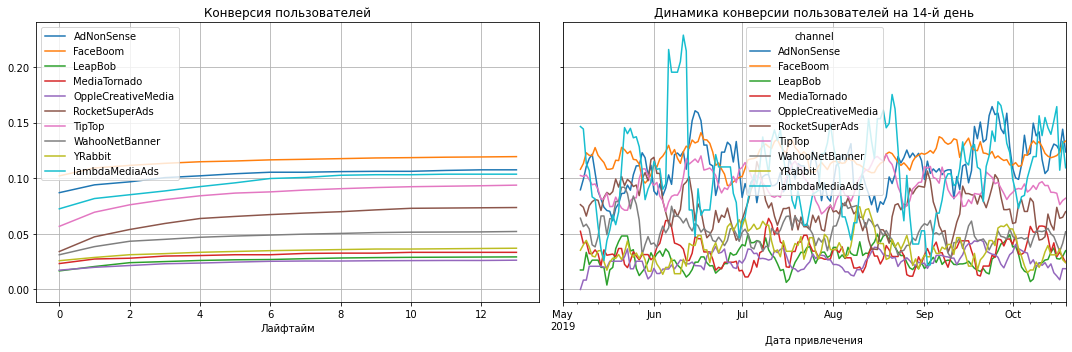

In [67]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Однако, несмотря на заслуженную похвалу на прошлом этапе, YRabbit показывет низкую конверсию, а FaceBoom - хорошую

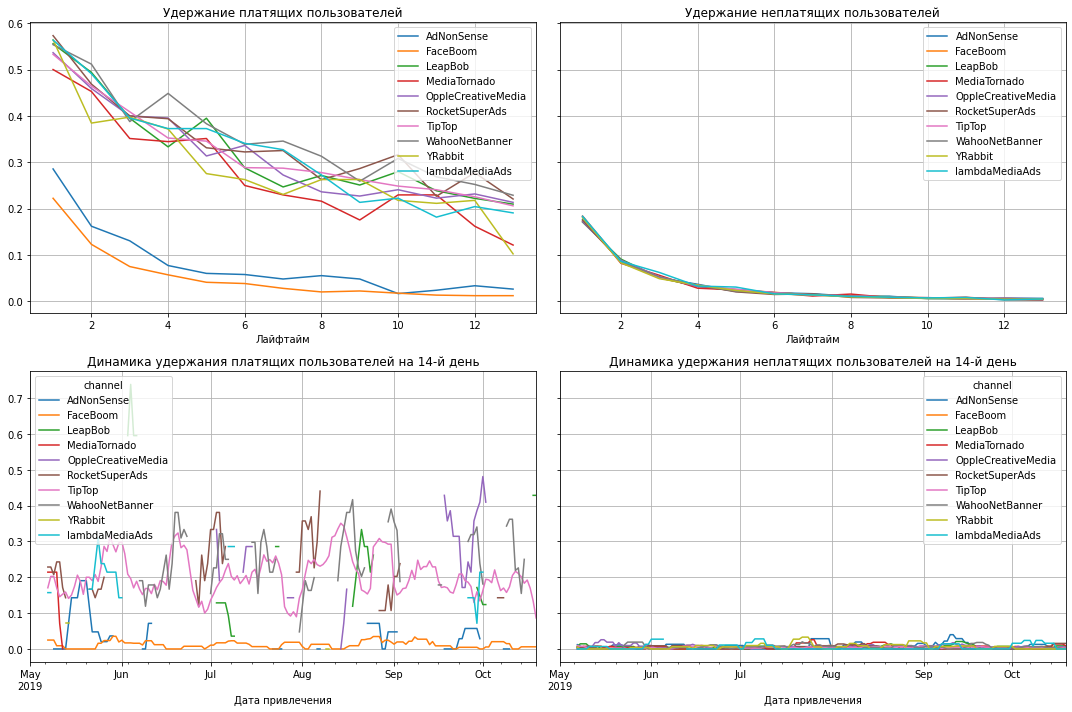

In [68]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- Вновь видим, что люди из Faceboom'а не задерживаются - динамика удержания хуже всех!
- Также, выпадает AdNonSense - весьма плачевные показатели удержания, но есть отдельные "всплески" по удержанию WahooNetBanner - этот источник рекламы, по видимому, раздражает не всех и способен привлекать клиентов :)
- Все остальные источники ведут себя идентично

## Анализ эффективности источников привлечения клиентов в США (также без учета органики)

In [69]:
profiles_usa = profiles_not_organic.query('region == "United States"')
display(profiles_usa)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


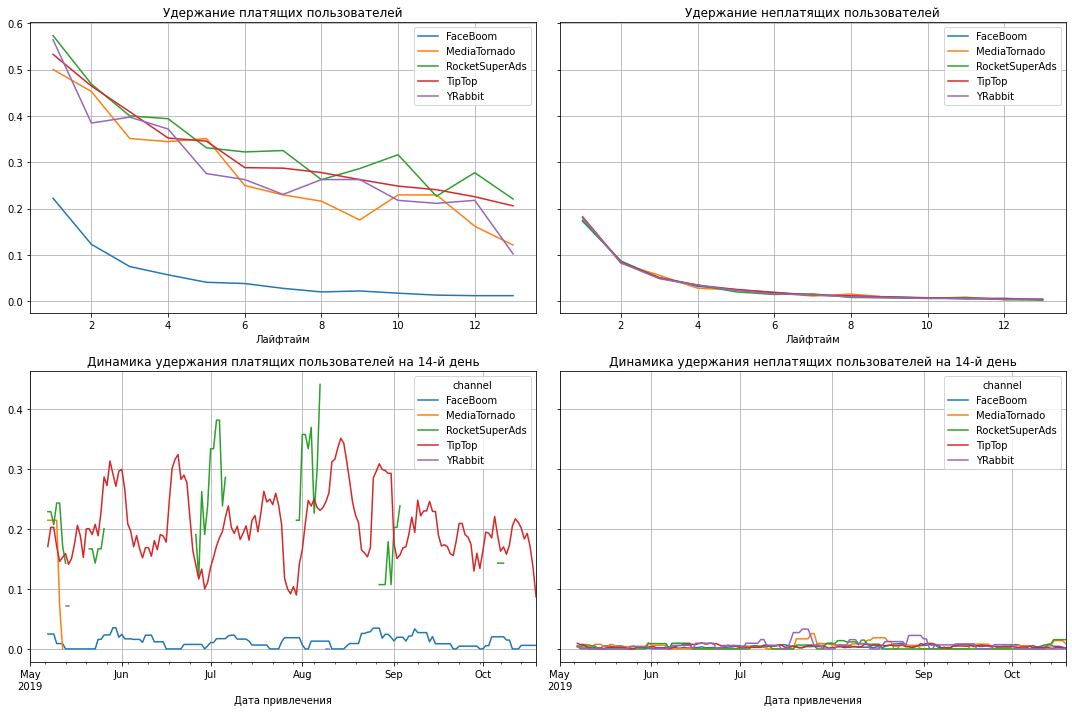

In [70]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим, что показатель удержания платящих пользователей хуже всего у Faceboom'а (не забываем, что это вторая после TipTop статья расхода). Можно сделать вывод, что Faceboom в США не способен показывать достойные показатели. Следует перераспределить эти вложения в другие источники. Например, RocketSuperAds показывает лучшие показатели

# 5.5. Выводы

- Маркетинговые вложения почти окупаются в срок, обозначенный в политике компании (2 недели). К концу 2-й недели реклама близка к окупаемости
- Пользователи из США явно снижают окупаемость продукта
- Имело место нерациональное вложение средств в источники привлечения - у клиентов в Faceboom очень низкие показатели удержания
- CAS источника TipTop многократно растет. С учетом того, что выявлены и другие источники, показывающие, неплохие показатели, стоит проанализировать целесообразность увеличения инвестиций именно в этот источник
- В США наблюдается не только низкая окупаемость маркетинга, но и общий отток клиентов

# Шаг 6. Общий вывод

**По итогам проделанного исследования есть основания сообщить отделу маркетинга приложения Procrastinate Pro+ следующее:**

**Причины убыточной маркетинговой кампании:**
- увеличение инвестиций в Tip-Top не принесло ожидаемых результов. Нет оснований точно сказать, с чем был связан такой шаг, но факт в том, что это оказалось не только нерентабельно, но и убыточно
- вторая по величине статья расходов - FaceBoom тоже не лучшим образом себя проявила
- имел место провал на рынке США, где пользователей было больше всего, расходы на рекламу велики, но потребитель заходит в приложение - и почти всегда не возвращается

**Резюмируя:**
Следует порекомендовать отделу маркетинга:
- пересмотреть распределение финансирования источников привлечения клиентов. Например, люди пришедшие из YRabbit задерживались в приложении намного дольше, правда, ничего не покупали
- проводить исследования, идентичные этому значительно чаще, т.к. проблема с оттоком клиентов начала прослеживаться в середине июня и до ноября не были произведены изменения, затраты на неудачные источники привлечения были также велики
- установить причины отказа клиентов от приложения (например, Мас, которые достаточно дороги в привлечении, но не особенно задерживаются) и произвести корректировки в функционале приложения
- проивести анализ причин подобного поведения рынка США (об этом в отдельном выводе)

А также:
**провести детальный анализ причин невостребованности продукта в США.** Скорее всего, проблема не только в неудачном распределении ресурсов привлечения. Увы, в рамках имеющихся данных нельзя сказать точно, но склоняюсь предположить, что проблема может быть в:
- несоответствии потрета потребителя концепции продукта (банально нет интереса),
- технические проблемы,
- проблемы с оплатой (или неадекватная ценовая политика приобретения дополнительного контента),
- проигранная конкуренция

На эти доводы наводит факт резкого падения окупаемости в конце мая, до этого все не было так плохо. Думаю, пользователи ушли на какой-то более интересный для них продукт.

Если ни одна из прогнозируемых причин не стала причиной провала на рынке США или не подлежит корректировке - также нужен пересмотр инвестиций в рекламу, т.к. стоимость привлечения клиентов в этом сегменте самая высокая, а результат плачевный.

# Спасибо за внимание!